In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sbn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('Dataset/clean_Telco_data.csv')

In [3]:
df

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [4]:
df.drop('Unnamed: 0', axis = 1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [5]:
df_new = df.drop('Unnamed: 0', axis = 1)

In [6]:
df_new.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [7]:
df_new['SeniorCitizen'] = df_new['SeniorCitizen'].astype('category')

In [8]:
df_new.dtypes

customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [9]:
# descriptives

In [10]:
df_new

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [11]:
df_new.columns = df_new.columns.str.lower()

In [12]:
df_new.describe().round(2)

,tenure,monthlycharges,totalcharges
count,7043.00,7043.00,7043.00
mean,32.37,64.76,2283.30
std,24.56,30.09,2265.00
min,0.00,18.25,18.80
25%,9.00,35.50,402.22
50%,29.00,70.35,1400.55
75%,55.00,89.85,3786.60
max,72.00,118.75,8684.80


In [13]:
numerical_cols = df_new.select_dtypes(include = ['int', 'float'])
numerical_cols

,tenure,monthlycharges,totalcharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [14]:
correlation = numerical_cols.corr()
correlation

,tenure,monthlycharges,totalcharges
tenure,1.000000,0.247900,0.824757
monthlycharges,0.247900,1.000000,0.650468
totalcharges,0.824757,0.650468,1.000000


# Target Analysis

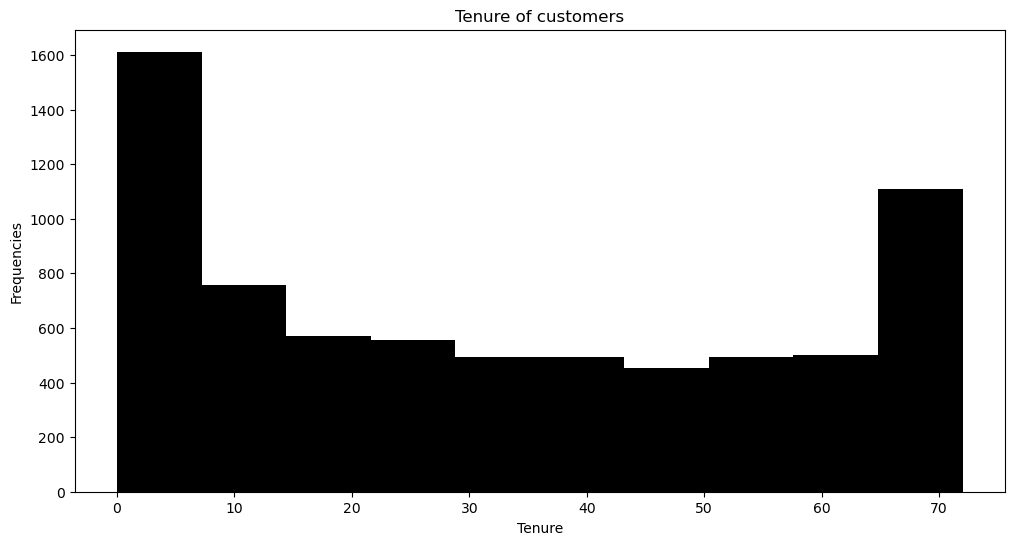

In [16]:
plt.figure(figsize = (12, 6))

plt.hist(df_new['tenure'][df_new['tenure']<100000], color = 'black')
plt.title('Tenure of customers') 
plt.xlabel('Tenure')
plt.ylabel('Frequencies')
plt.show()
#(df['msrp'][df['msrp']< 100000], color = 'brown')

In [17]:
# Normalising data
log_tenure = np.log1p(df_new['tenure'])

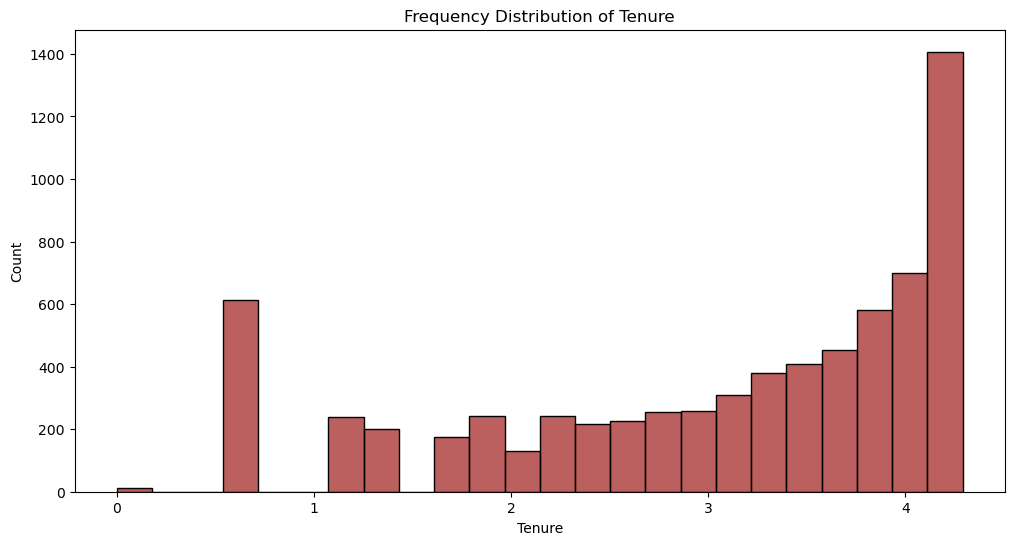

In [18]:
plt.figure(figsize = (12, 6))
plt.title('Frequency Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')

sbn.histplot(log_tenure, color = 'brown')
plt.show()

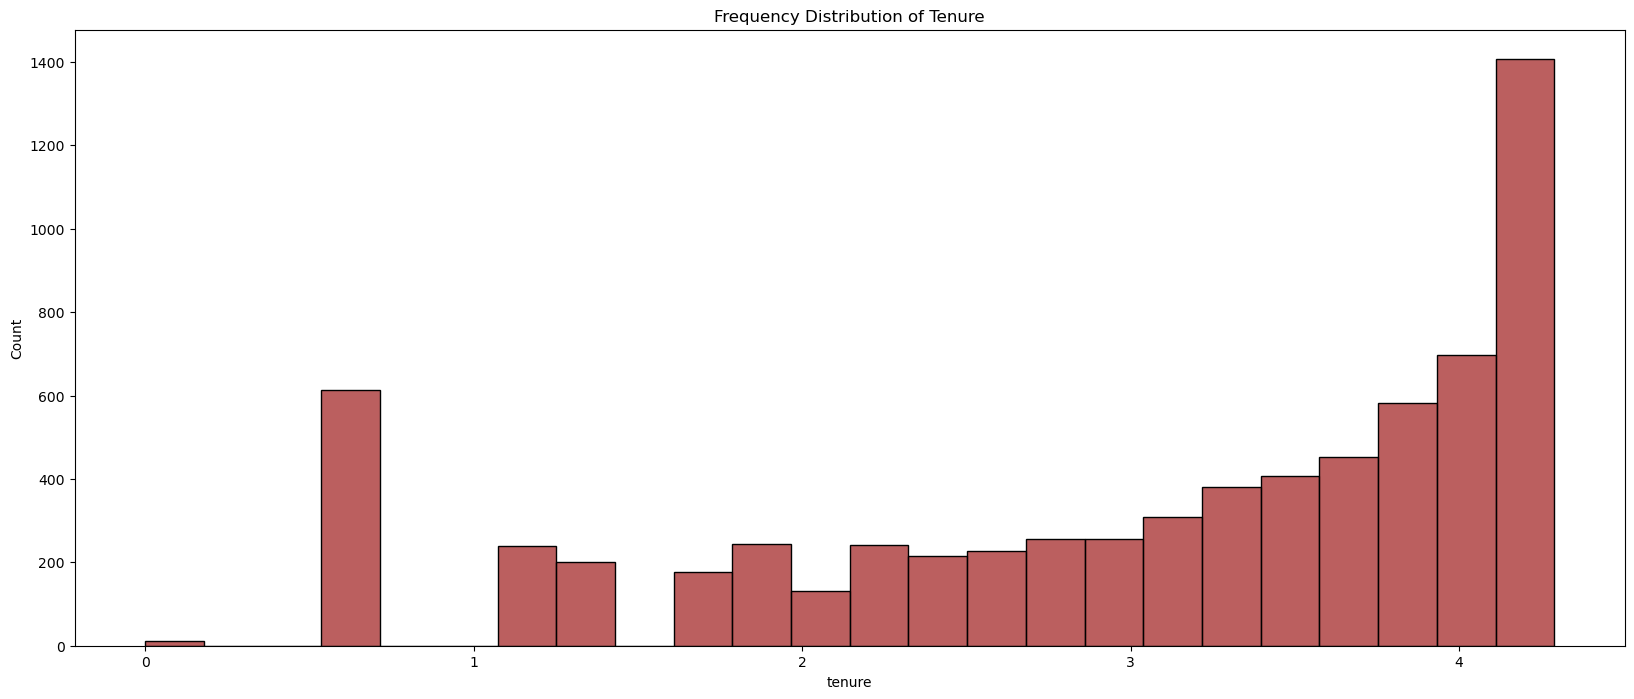

In [19]:
plt.figure(figsize = (20, 8))
plt.title('Frequency Distribution of Tenure')
plt.xlabel('tenure')
plt.ylabel('Count')

sbn.histplot(log_tenure, color = 'brown')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

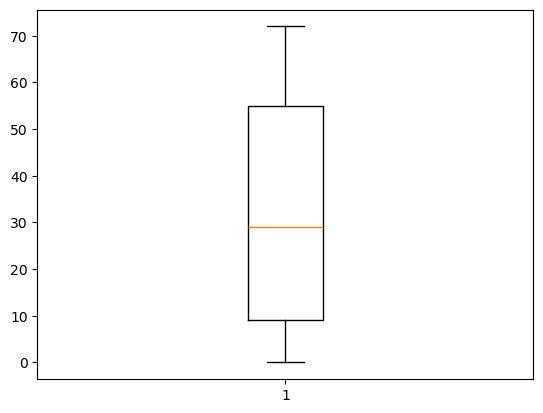

In [20]:
plt.boxplot(df_new['tenure'])
plt.show

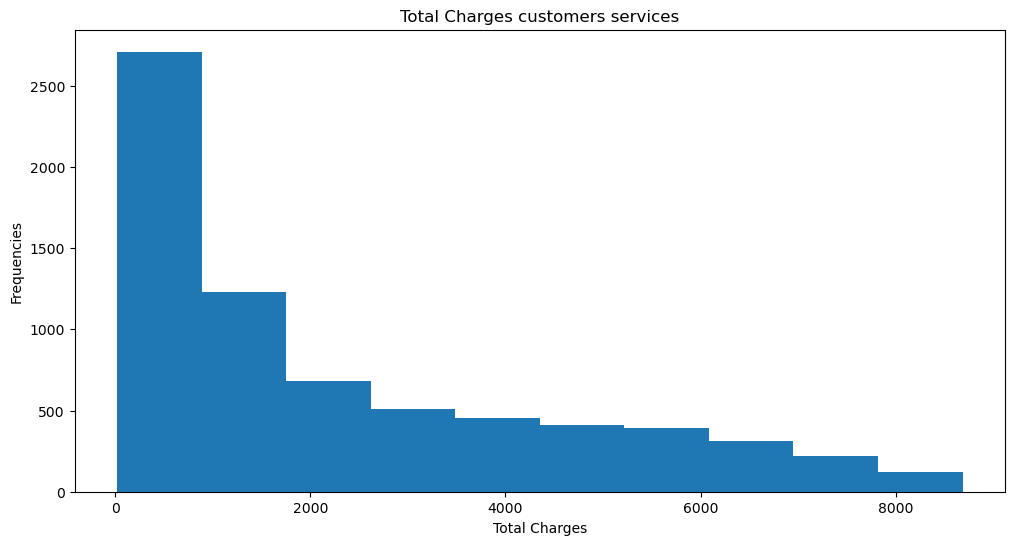

In [21]:
plt.figure(figsize = (12, 6))

plt.hist(df_new['totalcharges'])
plt.title('Total Charges customers services') 
plt.xlabel('Total Charges')
plt.ylabel('Frequencies')
plt.show()

In [22]:
df_new['log_totalcharges'] = np.log1p(df_new['totalcharges'])

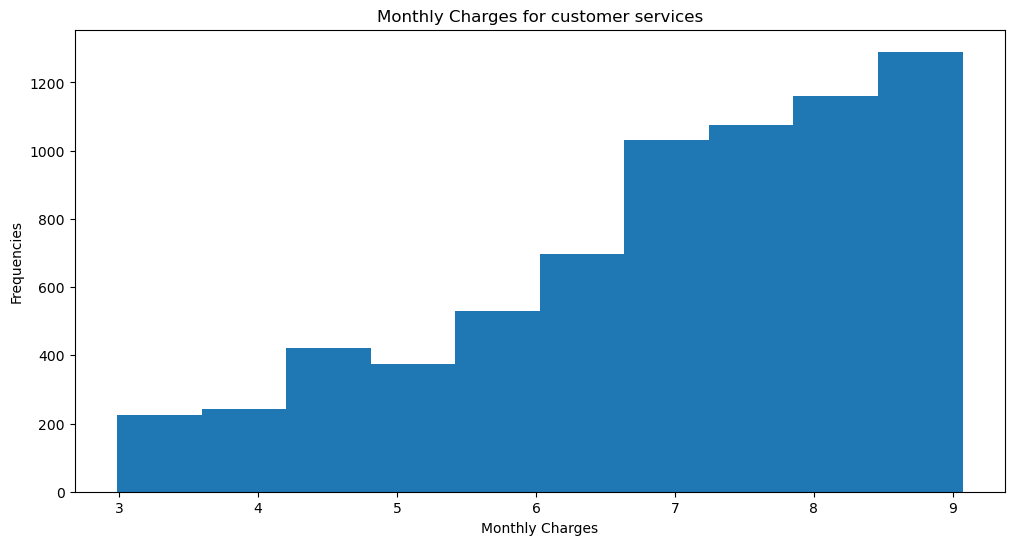

In [23]:
plt.figure(figsize = (12, 6))

plt.hist(df_new['log_totalcharges'])
plt.title('Monthly Charges for customer services') 
plt.xlabel('Monthly Charges')
plt.ylabel('Frequencies')
plt.show()

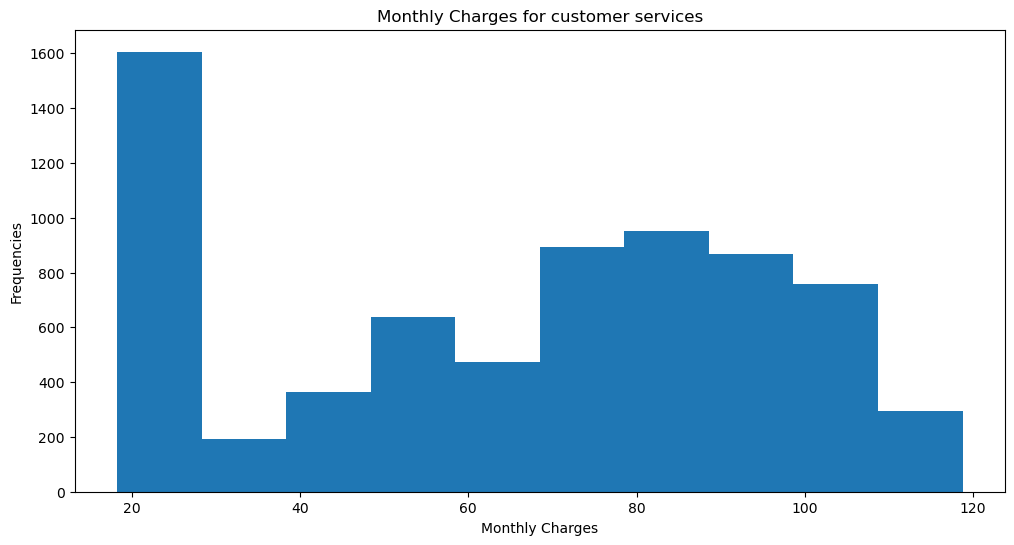

In [24]:
plt.figure(figsize = (12, 6))

plt.hist(df_new['monthlycharges'])
plt.title('Monthly Charges for customer services') 
plt.xlabel('Monthly Charges')
plt.ylabel('Frequencies')
plt.show()

In [25]:
df_new['log_monthlycharges'] = np.log1p(df_new['monthlycharges'])

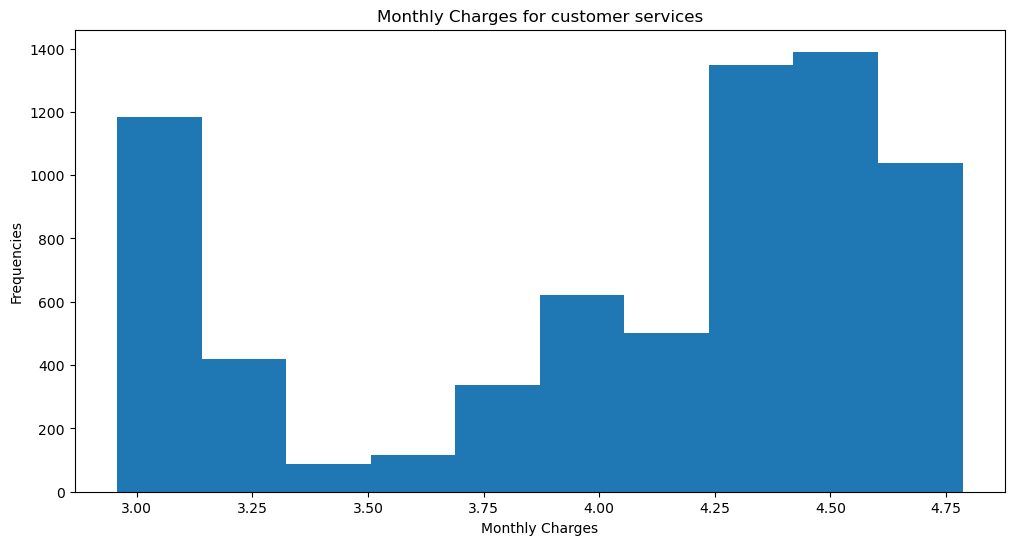

In [26]:
plt.figure(figsize = (12, 6))

plt.hist(df_new['log_monthlycharges'])
plt.title('Monthly Charges for customer services') 
plt.xlabel('Monthly Charges')
plt.ylabel('Frequencies')
plt.show()

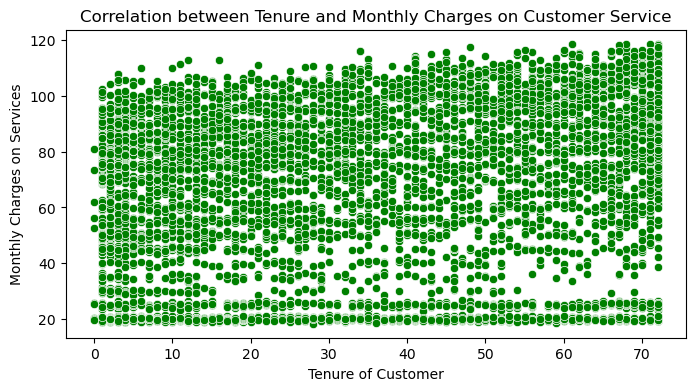

In [27]:
plt.figure(figsize = (8, 4))

sbn.scatterplot(data = df_new, x = 'tenure', y='monthlycharges', color='green') # this is the only difference between matplotlib and seaborn

plt.title('Correlation between Tenure and Monthly Charges on Customer Service') 
plt.xlabel('Tenure of Customer')
plt.ylabel('Monthly Charges on Services')
plt.show()

In [28]:
# Summary for categorical features
categorical_summary = df_new.describe(include=['object'])

#missing_values_after_conversion, numerical_summary, categorical_summary


In [29]:
categorical_summary

,customerid,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,2,2,2,2,2,2,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,4072,3096,5024,4614,4621,4999,4336,4311,3875,4171,2365,5174


C:\Users\Elitebook1040\AppData\Local\Temp\ipykernel_16392\3302457932.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.countplot(data=df_new, x='churn', palette='Set2')


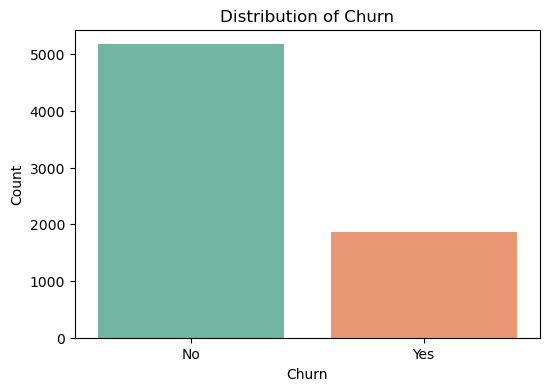

In [30]:
# Churn distribution
plt.figure(figsize=(6, 4))
sbn.countplot(data=df_new, x='churn', palette='Set2')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

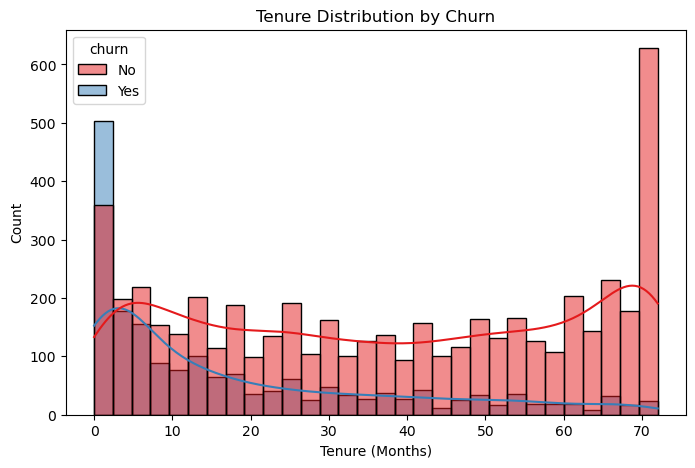

In [31]:
# Tenure vs Churn
plt.figure(figsize=(8, 5))
sbn.histplot(data=df_new, x='tenure', hue='churn', bins=30, kde=True, palette='Set1')
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()


C:\Users\Elitebook1040\AppData\Local\Temp\ipykernel_16392\703878361.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.boxplot(data=df_new, x='churn', y='monthlycharges', palette='Set3')


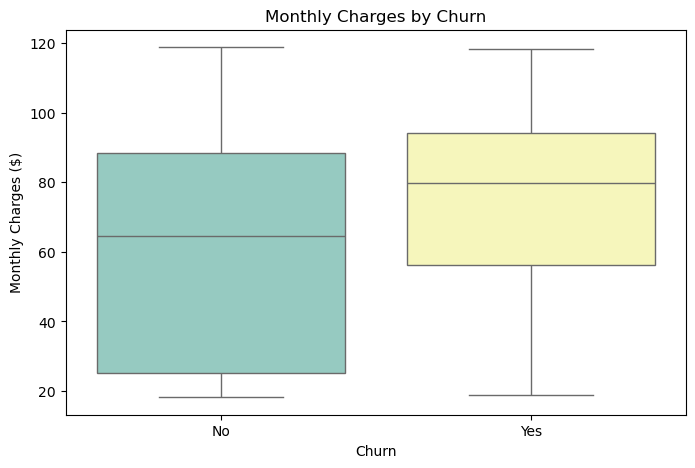

In [32]:
# Monthly Charges vs Churn
plt.figure(figsize=(8, 5))
sbn.boxplot(data=df_new, x='churn', y='monthlycharges', palette='Set3')
plt.title('Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges ($)')
plt.show()


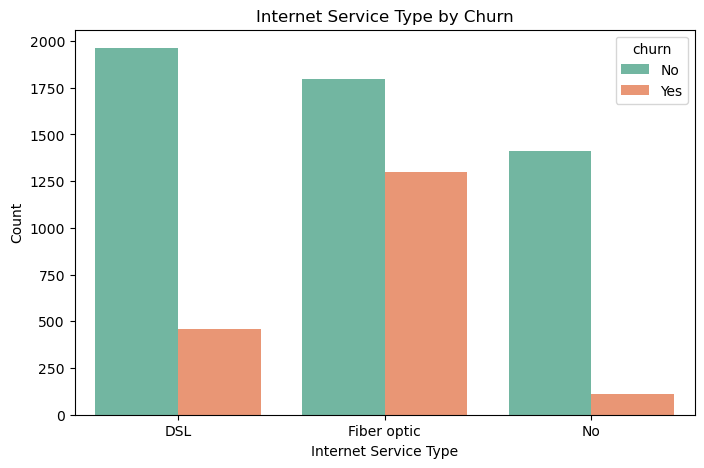

In [33]:
# Internet Service vs Churn
plt.figure(figsize=(8, 5))
sbn.countplot(data=df_new, x='internetservice', hue='churn', palette='Set2')
plt.title('Internet Service Type by Churn')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.show()


# building validation framework

In [38]:
# Spliting data
df_new_train_full, df_new_test = train_test_split(df, test_size=0.2, random_state=10) # the number 11 is arbitral, you can use any integer
df_new_train, df_new_valid = train_test_split(df_train_full, test_size=0.25, random_state=10)  # the random state can be change to give a better accuracy

print(f'Size of Training Dataset: {len(df_train)}')
print(f'Size of validation Dataset: {len(df_valid)}')
print(f'Size of Testing Dataset: {len(df_test)}')

Size of Training Dataset: 4225
Size of validation Dataset: 1409
Size of Testing Dataset: 1409


# selection of target column

In [48]:
dict_train_bl = df_new_train.to_dict(orient = 'records')
dict_valid_bl = df_new_valid.to_dict(orient = 'records')

In [54]:
# create new variables and assign them to our target variables and features after which we will delete from the main dataframe
# y-lables are the actual prediction y^ is ..
y_train = df_new_train['churn'].values
y_valid = df_new_valid['churn'].values
y_test = df_new_test['churn'].values

KeyError: 'churn'

In [52]:
dv = DictVectorizer(sparse=False) # sparse should be set to false
dv.fit(dict_new_train_bl)

NameError: name 'DictVectorizer' is not defined